In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img='/content/drive/MyDrive/original.jpg'


Text(0.5, 1.0, 'Box Filter')

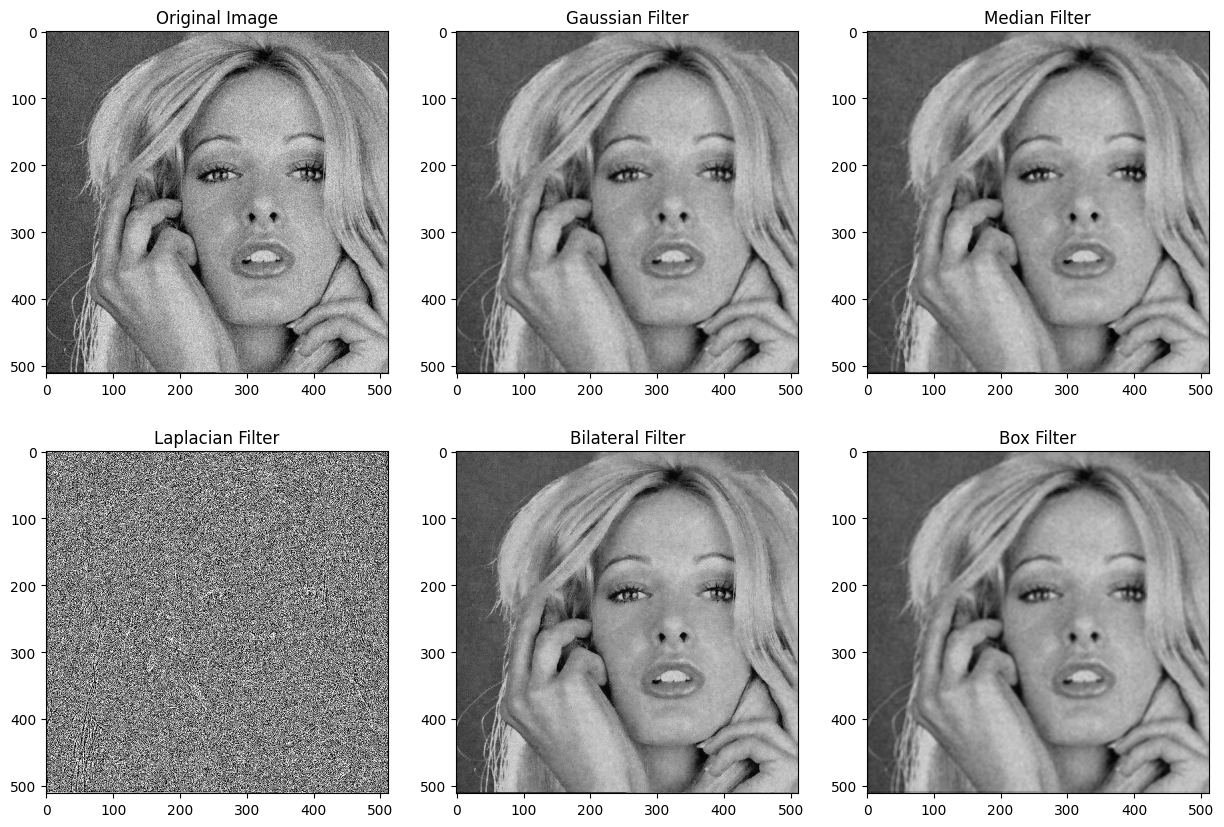

In [ ]:
plt.figure(figsize=(15,10))



original=cv2.imread(img)
plt.subplot(2,3,1)
plt.imshow(original)
plt.title('Original Image')



#doing the gaussian filter
gaussian_img=cv2.GaussianBlur(original,(5,5),0)
plt.subplot(2,3,2)
plt.imshow(gaussian_img)
plt.title("Gaussian Filter")



# Median Filter
plt.subplot(2,3,3)
median_img = cv2.medianBlur(original, 5)
plt.imshow(median_img)
plt.title('Median Filter')


# Laplacian Filter
plt.subplot(2,3,4)
laplacian_img = cv2.Laplacian(original, cv2.CV_64F)
plt.imshow(laplacian_img, cmap='gray')
plt.title('Laplacian Filter')


# Bilateral Filter
plt.subplot(2, 3, 5)
bilateral_img = cv2.bilateralFilter(original, 9, 75, 75)
plt.imshow(bilateral_img)
plt.title('Bilateral Filter')


# Box Filter
plt.subplot(2, 3, 6)
box_img = cv2.boxFilter(original, -1, (5, 5))
plt.imshow(box_img)
plt.title('Box Filter')

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def region_growing(image, seed):
    height, width = image.shape
    segmented = np.zeros_like(image)
    visited = np.zeros_like(image)
    queue = []

    def is_valid(x, y):
        return 0 <= x < width and 0 <= y < height

    def is_visited(x, y):
        return visited[y, x] == 1

    queue.append((seed[0], seed[1]))
    segmented[seed[1], seed[0]] = image[seed[1], seed[0]]

    while queue:
        x, y = queue.pop(0)

        neighbors = [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1),
                     (x + 1, y + 1), (x - 1, y - 1), (x + 1, y - 1), (x - 1, y + 1)]

        for neighbor in neighbors:
            nx, ny = neighbor

            if is_valid(nx, ny) and not is_visited(nx, ny):
                if abs(int(image[y, x]) - int(image[ny, nx])) < threshold:
                    segmented[ny, nx] = image[ny, nx]
                    visited[ny, nx] = 1
                    queue.append((nx, ny))

    return segmented

# Example usage
image_path = "path/to/your/image.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define seed point (you can manually set this based on your image)
seed_point = (100, 100)

# Set threshold (you may need to adjust this based on your image characteristics)
threshold = 20

result = region_growing(image, seed_point)

# Display the original and segmented images using matplotlib in Colab
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Segmented Image')
plt.show()
